# Customer Credit-ability Classification - using Logistic Regression, Decision Tree, Random Forest and XGBoost

_Author_: QH  
_First Version Date: 2022-01-18_  
_Latest update on: 2022-11-18_

The objective of this project is to classify customer's creditability based on German Credit data using very commonly used classification methods in Machine Learning. Sections are arranged as follows:
1. Data Dictionary of German Credit data
2. Exploratory Analysis to better understand the data
3. Classification
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * XGBoost
4. Evaluation and Comparison of the classification methods

## Data Dictionary of German Credit Data
The following is the data dictionary for this dataset. Some of the variables have been label encoded (i.e. ordinal encoded):

| Variable Name | Description | Values|Type|
| :--|:-- | :-- |:--|
|`Creditability`|Credit-worthiness of a client|1: credit-worthy <br> 0: not credit-worth|Target Variable|
|`Account Balance`|Balance of current account|1: no running account <br> 2: no balance or debit <br> 3: 0 <= ... < 200 DM <br> 4: ... >= 200 DM for checking account for at least 1 year|Ordinal|
|`Duration of Credit (month)`|Duration in months (metric)|-|Numeric|
|`Payment Status of Previous Credit`|Payment of previous credits|0：hesitant payment of previous credits <br> 1: problematic running account / there are further credits running but at other banks <br> 2: no previous credits / paid back all previous credits <br> 3: no problems with current credits at this bank <br> 4: paid back previous credits at this bank|Nominal|
|`Purpose`|Purpose of Credit|0:other <br> 1:new car <br> 2:used car <br> 3:items of furniture <br> 4:radio / television <br> 5:household appliances <br> 6:repair <br> 7:education <br> 8:vacation <br> 9:retraining <br> 10:business|Nominal|
|`Credit Amount`|Amount of credit|-|Numeric|
|`Value Savings/Stocks`|Value of savings or stocks|1:not available / no savings <br> 2: < 100 DM <br> 3: 100 <= ... < 500 - DM <br> 4:500 <= ... < 1000 DM <br> 5: >= 1000 DM|Ordinal|
|`Length of current employment`|Has been employed by current employer for|1: unemployed <br> 2: <= 1 year <br> 3: 1 <= ... < 4 years <br> 4: 4 <= ... < 7 years <br> 5: >= 7 years|Ordinal|
|`Instalment per cent`|Instalment in % of available income|1:>= 35 <br> 2: 25 <= ... < 35 <br> 3:20 <= ... < 25 <br> 4: < 20 |Ordinal|
|`Sex & Marital Status`|Marital Status/Sex|1: male: divorced / living apart <br> 2: male: single <br> 3: male: married / widowed <br> 4: female|Nominal|
|`Guarantors`|Further debtors / Guarantors|1: none <br> 2: Co-Applicant <br> 3: Guarantor|Ordinal|
|`Duration in Current address`|Living in current household for|1: < 1 year <br> 2: 1 <= ... < 4 years <br> 3: 4 <= ... < 7 years <br> 4: >= 7 years|Ordinal|
|`Most valuable available asset`|Most valuable available assets|1: not available / no assets <br> 2: Car / Other <br> 3: Savings contract with a building society / Life insurance <br> 4: Ownership of house or land|Nominal/Ordinal|
|`Age (years)`|Age in years|-|Numeric|
|`Concurrent Credits`|Further running credits|1: at other banks <br> 2: at department store or mail order house <br> 3: no further running credits|Nominal/Ordinal|
|`Type of apartment`|Type of apartment|1: rented flat <br> 2: owner-occupied flat <br> 3: free apartment|Nominal/Ordinal|
|`No. of Credits at this Bank`|Number of previous credits at this bank including the running one|1: one <br> 2: two or three <br> 3: four or five <br> 4: six or more|Ordinal|
|`Occupation`|Occupation|1: unemployed / unskilled with no permanent residence <br> 2: unskilled with permanent residence <br> 3: skilled worker / skilled employee / minor civil servant <br> 4: executive / self-employed / higher civil servant|Nominal/Ordinal|
|`No of dependents`|Number of persons entitled to maintenance|1: 0 - 2 <br> 2: 3 and more |Ordinal|
|`Telephone`|Whether he/she has a telephone?|1: no <br> 2: yes|Nominal|
|`Foreign Worker`|Whether he/she is a foreign worker?|1: yes <br> 2:no|Nominal|

## Python and Library Versions

Import the packages needed for the analysis and print out the versions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import scipy
import xgboost as xgb
import category_encoders as ce
import graphviz

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix
from itertools import product

# import utility functions
import sys
import os
# setting path
sys.path.append('..')
from py_util import util, preprocessing_util as prep

In [2]:
print('Python version: ' + sys.version)
package_dict = {'Pandas': pd, 'Numpy': np, 'Matplotlib': matplotlib, 'Seaborn': sns, 
'Scikit-Learn': sklearn, 'SciPy': scipy, 'xgboost': xgb, 'category_encoders': ce, 'graphviz': graphviz}
util.print_version(package_dict)

Python version: 3.9.4 (v3.9.4:1f2e3088f3, Apr  4 2021, 12:32:44) 
[Clang 6.0 (clang-600.0.57)]
Pandas: 1.4.3
Numpy: 1.23.2
Matplotlib: 3.5.3
Seaborn: 0.11.2
Scikit-Learn: 1.1.2
SciPy: 1.9.0
xgboost: 1.6.1
category_encoders: 2.5.1.post0
graphviz: 0.20.1


## Exploratory Analysis

First, we will read in datasets.

In [3]:
# read-in dataset
german_credit_ds = pd.read_csv("german_credit.csv")

In [4]:
german_credit_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
# Take a look at the data
german_credit_ds.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### Univariate Analysis

In [6]:
# Columns of the data: Creditability is the target variable
variables = prep.split_num_cat_target(german_credit_ds, 'Creditability', lvl_theta=10)
variables

{'categorical': ['Account Balance',
  'Payment Status of Previous Credit',
  'Purpose',
  'Value Savings/Stocks',
  'Length of current employment',
  'Instalment per cent',
  'Sex & Marital Status',
  'Guarantors',
  'Duration in Current address',
  'Most valuable available asset',
  'Concurrent Credits',
  'Type of apartment',
  'No of Credits at this Bank',
  'Occupation',
  'No of dependents',
  'Telephone',
  'Foreign Worker'],
 'target': ['Creditability'],
 'id': [],
 'numeric': ['Duration of Credit (month)', 'Credit Amount', 'Age (years)']}

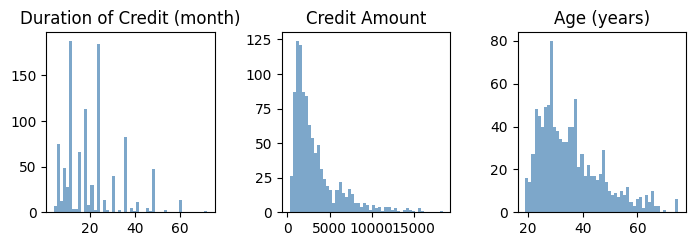

In [12]:
# Descriptive stats for the features
prep.plot_all_dist(german_credit_ds, (8, 2), variables['numeric'], 1, 3)

From the histogram of the numeric variables, it is noticable that all of them are not normally distributed. We can try to do a transformation on the variables.

In [8]:
log_trans_df = german_credit_ds[variables['numeric']].astype(float).apply(lambda x: np.log(x + 0.0), axis = 1, result_type = 'broadcast')
log_trans_df.rename(columns={'Duration of Credit (month)':'Duration of Credit (month)_log',
'Credit Amount': 'Credit Amount_log', 'Age (years)': 'Age (years)_log'}, inplace=True)

In [9]:
german_credit_ds_new = pd.concat([german_credit_ds, log_trans_df], axis=1)
german_credit_ds_new

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Duration of Credit (month)_log,Credit Amount_log,Age (years)_log
0,1,1,18,4,2,1049,1,2,4,2,...,3,1,1,3,1,1,1,2.890372,6.955593,3.044522
1,1,1,9,4,0,2799,1,3,2,3,...,3,1,2,3,2,1,1,2.197225,7.937017,3.583519
2,1,2,12,2,9,841,2,4,2,2,...,3,1,1,2,1,1,1,2.484907,6.734592,3.135494
3,1,1,12,4,0,2122,1,3,3,3,...,3,1,2,2,2,1,2,2.484907,7.660114,3.663562
4,1,1,12,4,0,2171,1,3,4,3,...,1,2,2,2,1,1,2,2.484907,7.682943,3.637586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,3,1,1,2,2,1,1,3.178054,7.594381,3.044522
996,0,1,24,2,0,2303,1,5,4,3,...,3,2,1,3,1,1,1,3.178054,7.741968,3.806662
997,0,4,21,4,0,12680,5,5,4,3,...,3,3,1,4,1,2,1,3.044522,9.447781,3.401197
998,0,2,12,2,3,6468,5,1,2,3,...,3,2,1,4,1,2,1,2.484907,8.774622,3.951244


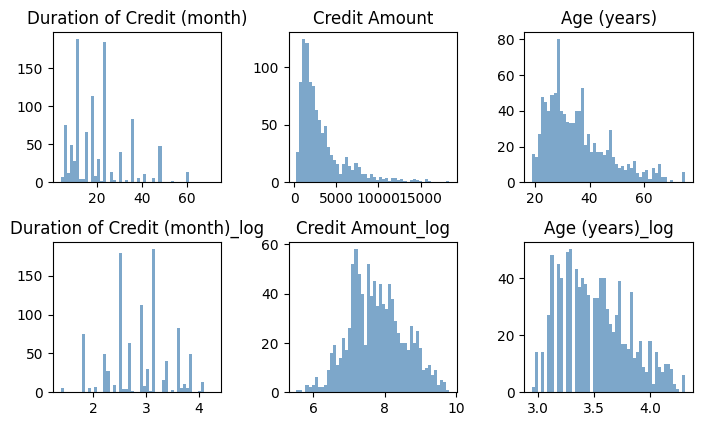

In [104]:
variables_new = prep.split_num_cat_target(german_credit_ds_new, 'Creditability', lvl_theta=10)
prep.plot_all_dist(german_credit_ds_new, (8, 4), variables_new['numeric'], 2, 3)

In [15]:
german_credit_ds_new.groupby('Creditability')[variables_new['numeric']].median()

,Duration of Credit (month),Credit Amount,Age (years),Duration of Credit (month)_log,Credit Amount_log,Age (years)_log
Creditability,,,,,,
0,24.0,2574.5,31.0,3.178054,7.853409,3.433987
1,18.0,2244.0,34.0,2.890372,7.716014,3.526361


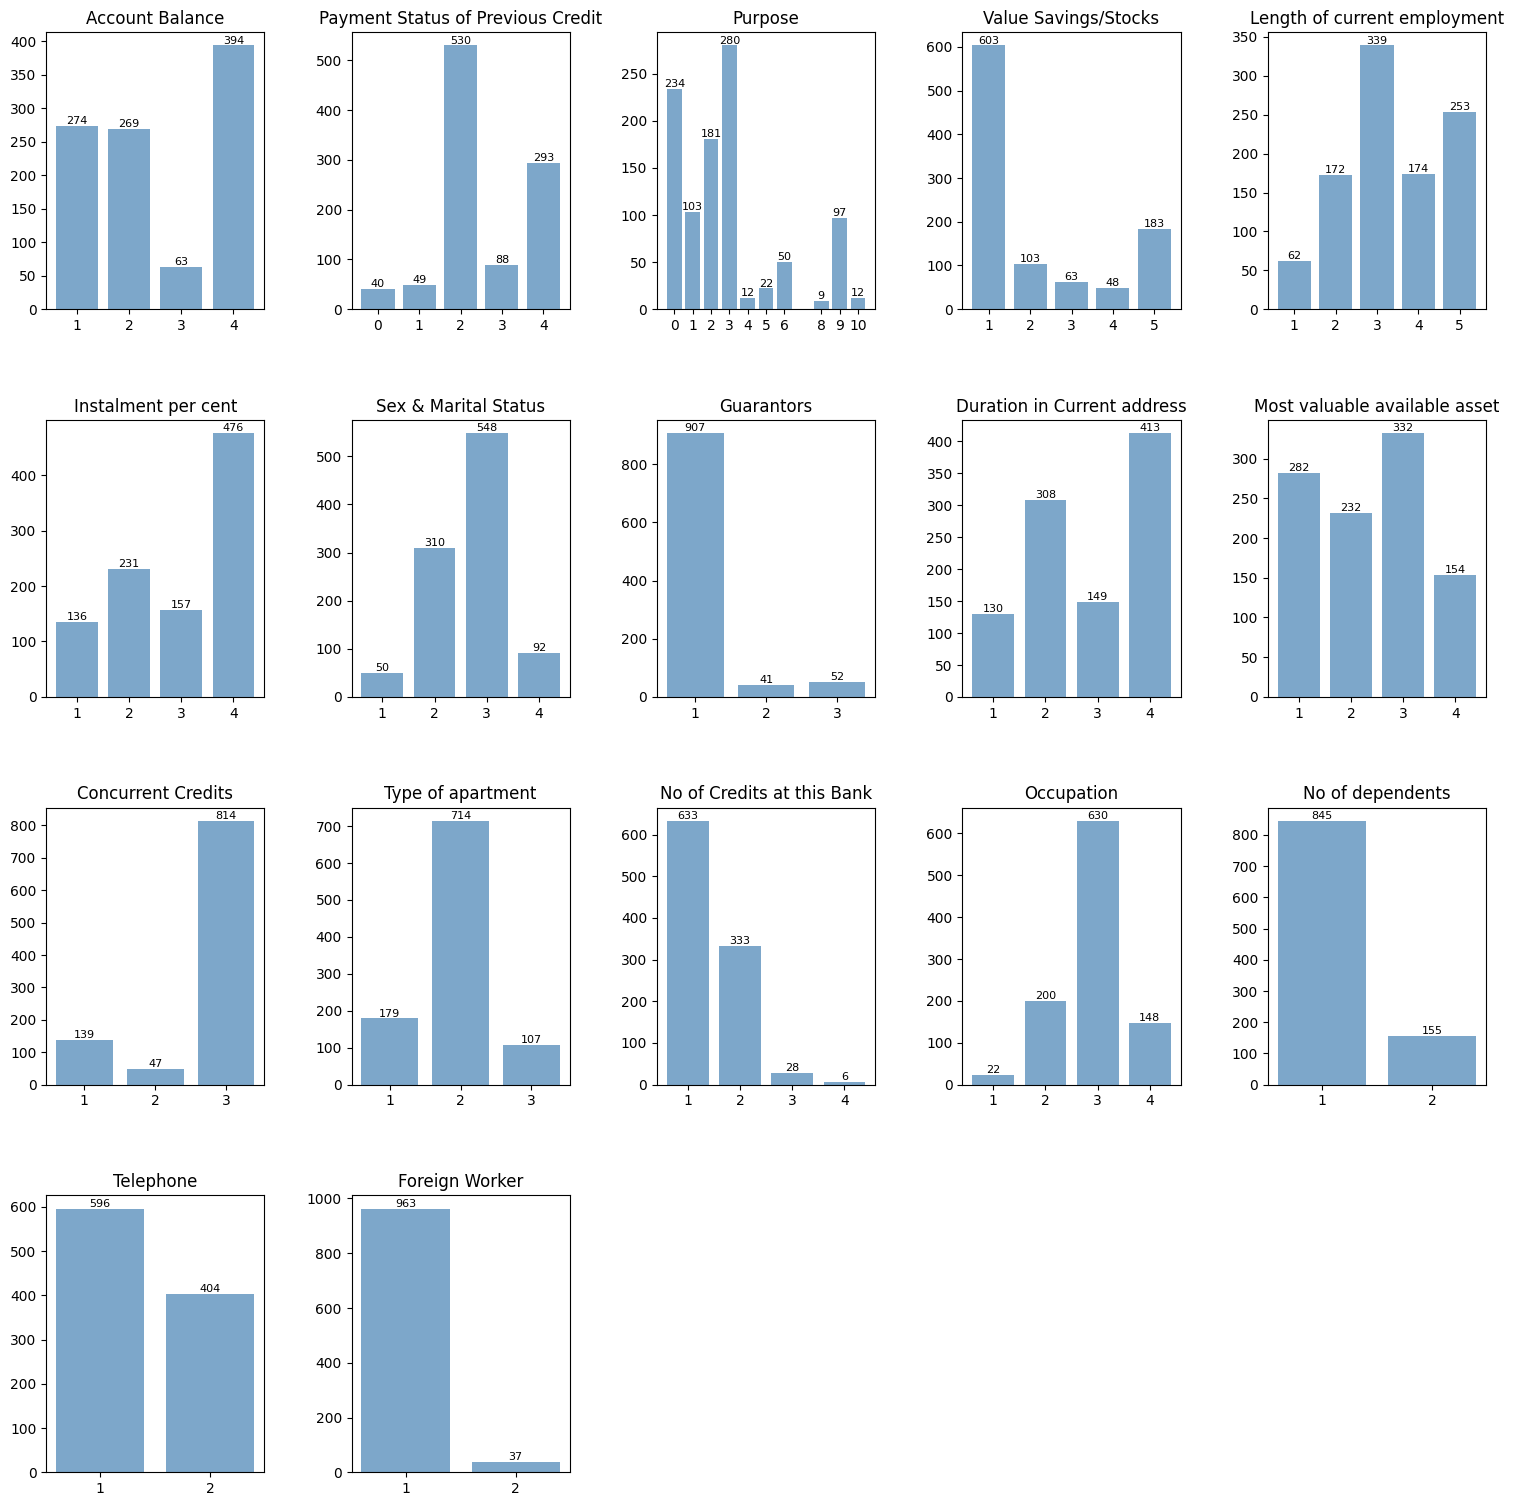

In [10]:
prep.plot_all_freq(german_credit_ds_new, (18, 16), variables_new['categorical'], 4, 5, spacing=0.01, fmt="{:.0f}", fontsize=8)

We need to combine categories for purpose and number of credits for this bank since the number of customers are very small in several categories. Specifically, we will group:
* Purpose = 4, 5 to be 11 as "TV or appliances"
* Purpose = 7, 8, 10 to be 12 as "Education or Business"
* No. of Credits in this bank = 3, 4 to be 5 as "Four or more"

In [50]:
german_credit_ds_new['Purpose_gp'] = np.where(german_credit_ds_new['Purpose'].isin([4, 5]), 11,
np.where(german_credit_ds_new['Purpose'].isin([7, 8, 10]), 12, german_credit_ds_new['Purpose']))
pd.crosstab(german_credit_ds_new['Purpose_gp'], german_credit_ds_new['Purpose'])

Purpose,0,1,2,3,4,5,6,8,9,10
Purpose_gp,,,,,,,,,,
0,234,0,0,0,0,0,0,0,0,0
1,0,103,0,0,0,0,0,0,0,0
2,0,0,181,0,0,0,0,0,0,0
3,0,0,0,280,0,0,0,0,0,0
6,0,0,0,0,0,0,50,0,0,0
9,0,0,0,0,0,0,0,0,97,0
11,0,0,0,0,12,22,0,0,0,0
12,0,0,0,0,0,0,0,9,0,12


In [51]:
german_credit_ds_new['No of Credits at this Bank_gp'] = np.where(german_credit_ds_new['No of Credits at this Bank'].isin([3, 4]), 5, german_credit_ds_new['No of Credits at this Bank'])
# check
pd.crosstab(german_credit_ds_new['No of Credits at this Bank_gp'], german_credit_ds_new['No of Credits at this Bank'])

No of Credits at this Bank,1,2,3,4
No of Credits at this Bank_gp,,,,
1,633,0,0,0
2,0,333,0,0
5,0,0,28,6


In [106]:
variables_new = prep.split_num_cat_target(german_credit_ds_new, 'Creditability', lvl_theta=10)
cat_var_list = variables_new['categorical'].copy()
cat_var_list.remove('Purpose')
cat_var_list.remove('No of Credits at this Bank')

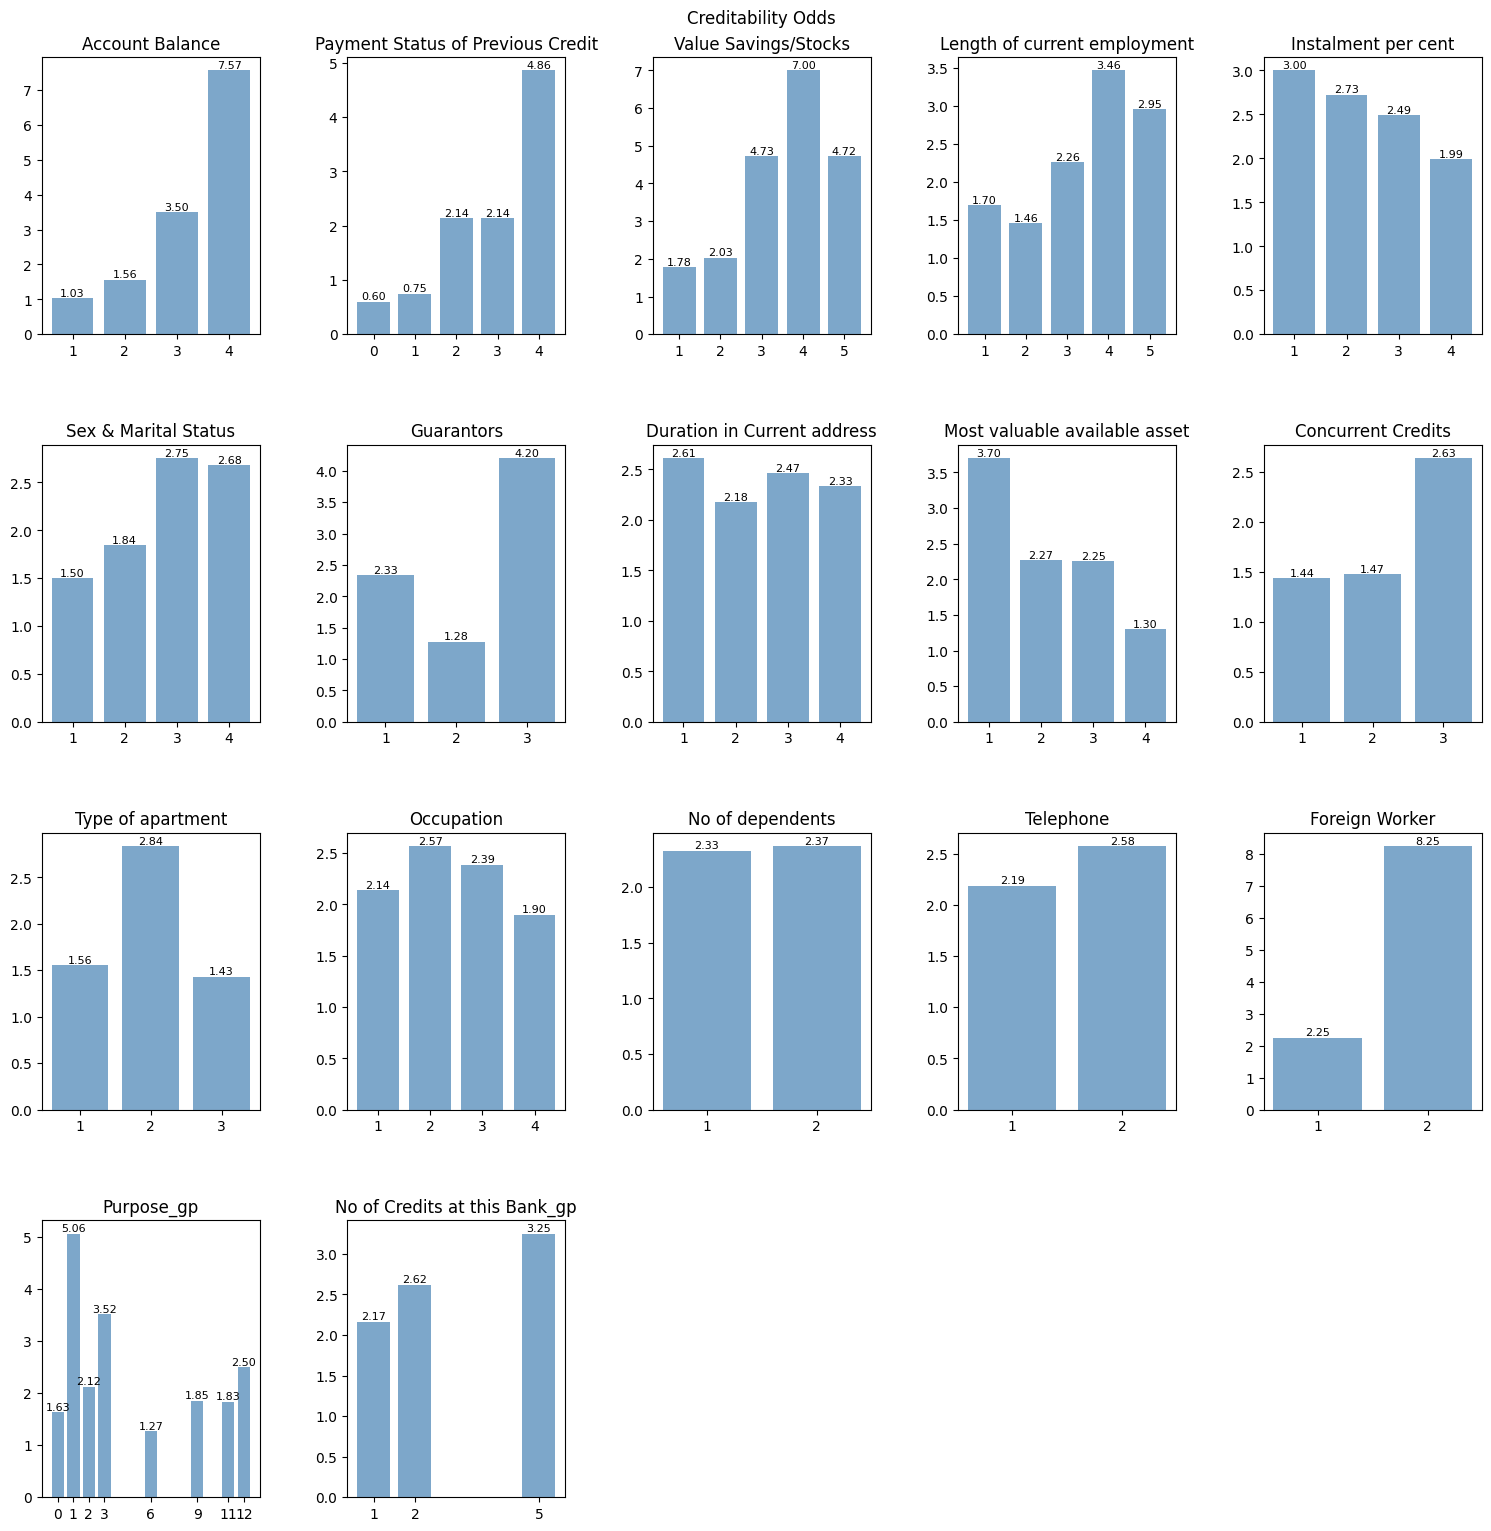

In [107]:
german_credit_ds_new['Count'] = 1

fig = plt.figure(figsize = (18, 16))
row = 4
col = 5
for index in range(1, len(cat_var_list) + 1):
        ax = fig.add_subplot(row, col, index)

        # Calculate odds of the creditability for each category
        cat_var = cat_var_list[index - 1]
        count_df = german_credit_ds_new.groupby([cat_var, 'Creditability'], as_index=False)['Count'].count()
        total_count_df = german_credit_ds_new.groupby(cat_var, as_index=False)['Count'].count().rename(columns={'Count':'Total_Count'})
        perc_df = count_df.merge(total_count_df, on=cat_var)
        perc_df['credit_perc'] = perc_df['Count'] / perc_df['Total_Count']
        credit = perc_df.loc[perc_df['Creditability'] == 1, [cat_var, 'credit_perc']].reset_index(drop=True)
        non_credit = perc_df.loc[perc_df['Creditability'] == 0, [cat_var, 'credit_perc']].reset_index(drop=True)
        x = credit[cat_var].values
        height = (credit['credit_perc'] / non_credit['credit_perc']).values

        # Create bar plot
        ax.bar(x=x, height=height, color = 'steelblue', alpha = 0.7)
        x.sort()
        ax.set_xticks(x)
        ax.set_title(cat_var)
        prep.add_value_labels(ax, spacing=0.01, fmt="{:.2f}", fontsize=8 )
        plt.subplots_adjust(left=0.1,
                            bottom=0.05,
                           right=0.9,
                           top=0.95,
                            wspace=0.4,
                            hspace=0.4)
        plt.suptitle('Creditability Odds')
plt.show()
german_credit_ds_new = german_credit_ds_new.drop(columns='Count')

In [114]:
# Numeric variables are Duration of Credit (month), Credit Amount, Age (years)
num_var_list = variables_new['numeric'].copy()
num_var_list.remove('Duration of Credit (month)')
num_var_list.remove('Credit Amount')
num_var_list.remove('Age (years)')
print(num_var_list)
# Categorical variables:
encode_cat_list = ['Sex & Marital Status', 'Purpose_gp', 'Occupation', 'Type of apartment']

['Duration of Credit (month)_log', 'Credit Amount_log', 'Age (years)_log']


In [116]:
# Original
german_credit_ds_new[encode_cat_list].head()
# One-hot encoding for nominal variables
encoder = ce.OneHotEncoder(cols = encode_cat_list, handle_unknown='return_nan', return_df=True, use_cat_names=True)
german_credit_ds_encoded=encoder.fit_transform(german_credit_ds_new)
german_credit_ds_encoded.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status_2.0,...,Age (years)_log,Purpose_gp_2.0,Purpose_gp_0.0,Purpose_gp_9.0,Purpose_gp_3.0,Purpose_gp_1.0,Purpose_gp_12.0,Purpose_gp_11.0,Purpose_gp_6.0,No of Credits at this Bank_gp
0,1,1,18,4,2,1049,1,2,4,1.0,...,3.044522,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,1,9,4,0,2799,1,3,2,0.0,...,3.583519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,1,2,12,2,9,841,2,4,2,1.0,...,3.135494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,1,1,12,4,0,2122,1,3,3,0.0,...,3.663562,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,1,1,12,4,0,2171,1,3,4,0.0,...,3.637586,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [111]:
X, y = german_credit_ds_encoded.iloc[:,1:], german_credit_ds_encoded.iloc[:,0]

## Logistic Regression

In [117]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression

# Create the dataset - binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defined the parameters
solver = ['lbfgs', 'liblinear']
penalty = ['l2']
c = [100, 10, 1.0, 0.3, 0.1, 0.01]
max_iter = [10000]
params = {'solver': solver, 'penalty': penalty, 'C': c, 'max_iter': max_iter}


# Create the logistic regression model
clf = LogisticRegression()

# Cross validation generator
#cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0)
cv_repeat = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state = 0)

# Grid Search the best parameter for the solver and c
grid_search = GridSearchCV(estimator=clf, param_grid=params, n_jobs=-1, cv=cv_repeat, scoring='roc_auc')
grid_search_result = grid_search.fit(X_train, y_train)

# Output results
print("Best: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))

Best: 0.777051 using {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}


## XGBoost

In [17]:
# Create design matrix - encoding

data_dmatrix = xgb.DMatrix(data=X, label=y)

In [18]:
# Create design matrix - no-encoding
X, y = german_credit_ds.iloc[:,1:], german_credit_ds.iloc[:,0]
data_dmatrix = xgb.DMatrix(data=X, label=y)

Use the following hyper parameters:
* `objective`='binary:logistic'
* `colsample_bytree` = 0.3
* `learning_rate` = 0.1
* `max_depth` = 5
* `alpha` = 10
* `n_estimator` = 10

In [57]:
# Training and Testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)
train_data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

# Create an XGboost instance using the predefined hyper parameters
xg_logit = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.25, learning_rate=0.5, max_depth=3, alpha=10, min_child_weight= 4, n_estimators=10)
xg_logit.fit(X_train, y_train, 
             eval_set=[(X_train, y_train), (X_test, y_test)],
             eval_metric='auc',
             verbose=True)
evals_result = xg_logit.evals_result()

[0]	validation_0-auc:0.55346	validation_1-auc:0.58135
[1]	validation_0-auc:0.72118	validation_1-auc:0.77419
[2]	validation_0-auc:0.72857	validation_1-auc:0.79335
[3]	validation_0-auc:0.74297	validation_1-auc:0.79795
[4]	validation_0-auc:0.75037	validation_1-auc:0.80601
[5]	validation_0-auc:0.76573	validation_1-auc:0.80051
[6]	validation_0-auc:0.76741	validation_1-auc:0.80183
[7]	validation_0-auc:0.77026	validation_1-auc:0.80395
[8]	validation_0-auc:0.77631	validation_1-auc:0.81138
[9]	validation_0-auc:0.77610	validation_1-auc:0.81123


In [20]:
# make predictions for test data
y_pred = xg_logit.predict_proba(X_test)[:,1]
# evaluate auc
auc_result = roc_auc_score(y_test, y_pred)
auc_result

0.8112343897706352

In [21]:
german_credit_ds.columns[1:]

Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [22]:
xg_logit.feature_importances_

array([0.3241573 , 0.        , 0.19760434, 0.        , 0.08591107,
       0.03250112, 0.04679714, 0.02047445, 0.00278739, 0.        ,
       0.        , 0.07396638, 0.04711536, 0.07597838, 0.09270705,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [23]:
xg_logit.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.25,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.5,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 10,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 10,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'alpha': 10}

[None, None, None, None]

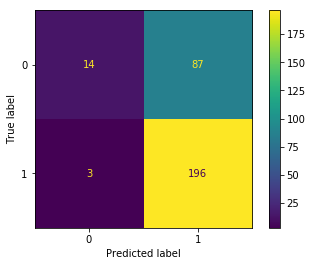

In [41]:
## Confusion Matrix
y_pred = xg_logit.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
n_classes = cm.shape[0]
im_ = ax.imshow(cm, interpolation='nearest', cmap='viridis')
cmap_min, cmap_max = im_.cmap(0), im_.cmap(256)
text_ = np.empty_like(cm, dtype=object)
# print text with appropriate color depending on background
thresh = (cm.max() + cm.min()) / 2.0
for i, j in product(range(n_classes), range(n_classes)):
    color = cmap_max if cm[i, j] < thresh else cmap_min
    text_cm = format(cm[i, j], '.2g')
    if cm.dtype.kind != 'f':
        text_d = format(cm[i, j], 'd')
        if len(text_d) < len(text_cm):
            text_cm = text_d
    text_[i, j] = ax.text(j, i, text_cm, ha="center", va="center",color=color)
    
display_labels = np.arange(n_classes)
fig.colorbar(im_, ax=ax)
ax.set(xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=display_labels,
       yticklabels=display_labels,
       ylabel="True label",
       xlabel="Predicted label")

ax.set_ylim((n_classes - 0.5, -0.5))
plt.setp(ax.get_xticklabels(), rotation='horizontal')

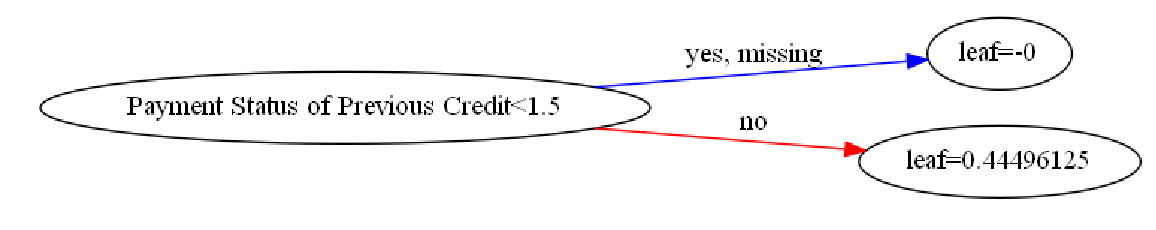

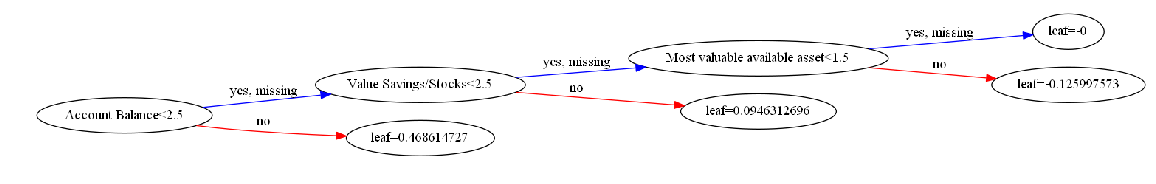

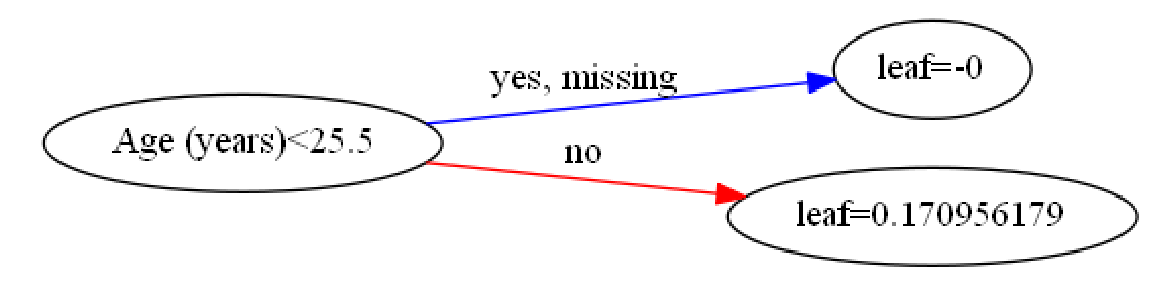

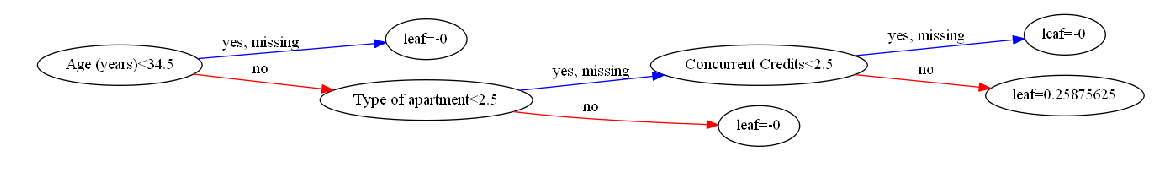

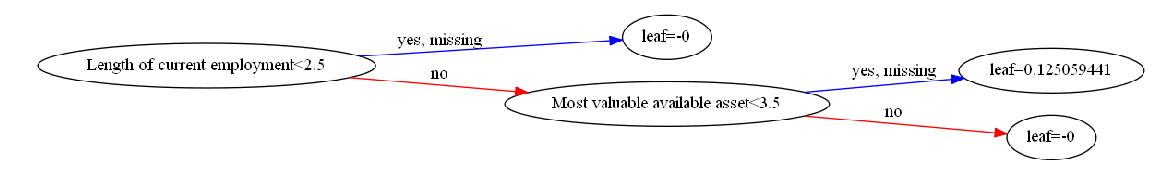

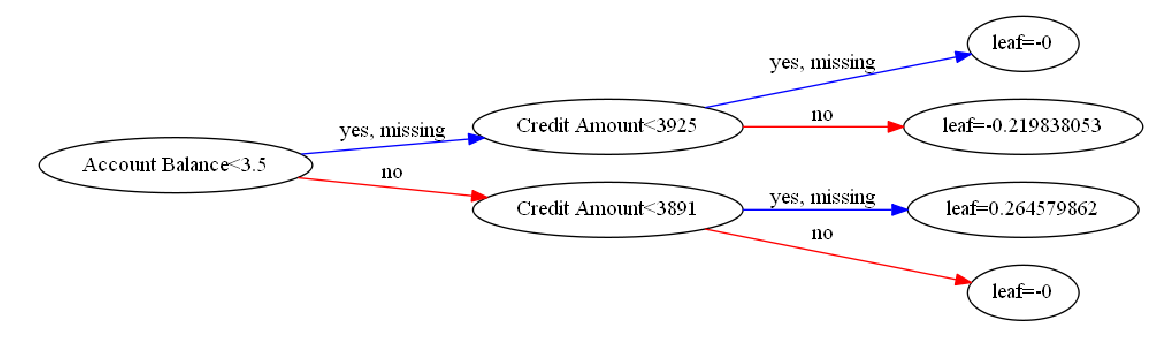

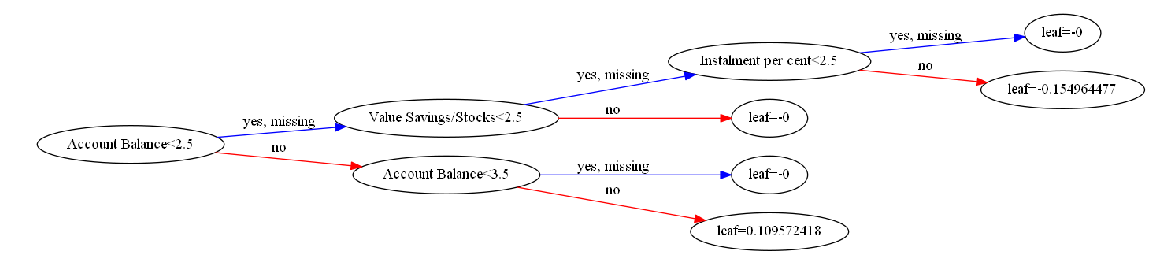

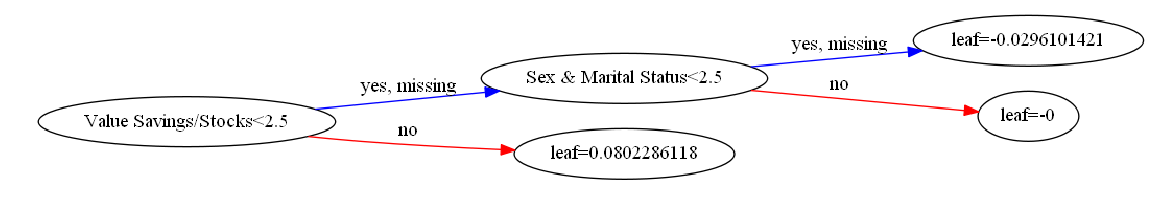

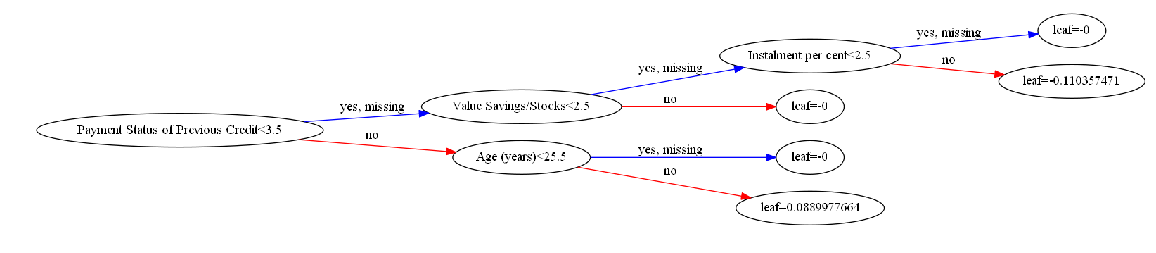

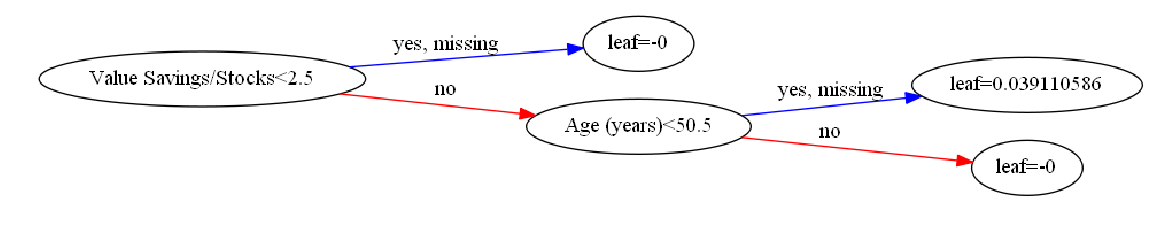

In [51]:
# num_trees: Specify the ordinal number of target tree
for i in range(0, 10):
    xgb.plot_tree(xg_logit, num_trees=i, rankdir='LR')
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

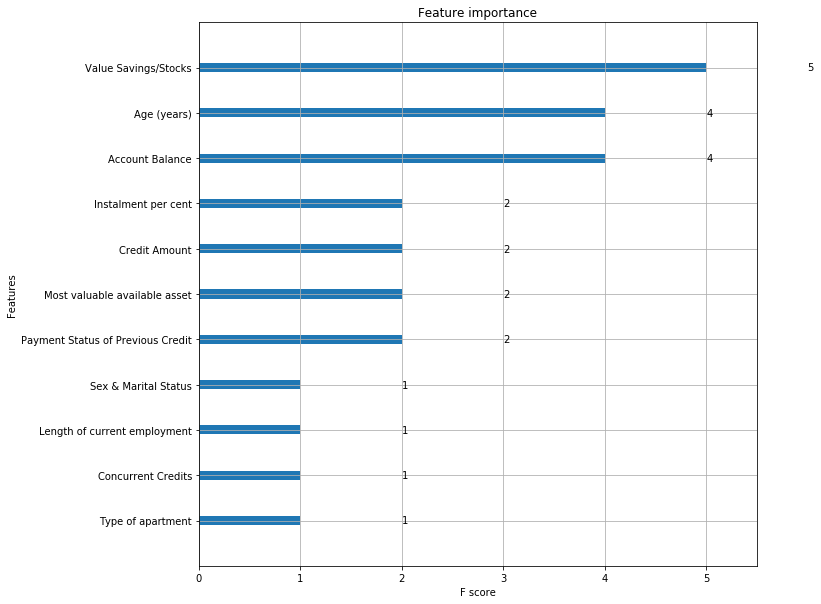

In [78]:
xgb.plot_importance(xg_logit)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [79]:
# Cross validation with given hyper parameters
# Define the Parameters
params = {'objective': 'binary:logistic',
         'colsample_bytree': 0.3,
         'learning_rate': 0.1,
         'max_depth' : 3,
         'alpha' : 10
}
# num_boost_round: Number of boosting iterations
# nfold: Number of folds in CV
# metrics: Evaluation metrics
# early_stopping_rounds:Activates early stopping
cv_results = xgb.cv(dtrain=train_data_dmatrix, params = params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics='auc', as_pandas=True, seed=123, verbose_eval=None)
cv_results.tail()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
45,0.822442,0.014786,0.742810,0.032300
46,0.822598,0.014671,0.743441,0.032194
47,0.822622,0.014700,0.743947,0.031981
48,0.822701,0.014739,0.744152,0.031847
49,0.823417,0.014716,0.744398,0.031804


In [80]:
# Hyper parameter tuning
gridsearch_params = [(max_depth, min_child_weight, colsample_bytree, learning_rate) for max_depth in range(3, 8) for min_child_weight in range(1, 5) 
                     for colsample_bytree in (0.25, 0.3, 0.5, 0.75, 1) for learning_rate in (0.01, 0.05, 0.1, 0.3, 0.5)]

In [81]:
params = {'objective': 'binary:logistic',
         'colsample_bytree': 0.3,
         'learning_rate': 0.1,
         'max_depth' : 3,
         'alpha' : 15,
         'min_child_weight':5
}
max_auc = float('-Inf')
for max_depth, min_child_weight, colsample_bytree, learning_rate in gridsearch_params:
    # print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
    # update parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['learning_rate'] = learning_rate
    # run CV
    cv_results = xgb.cv(dtrain=train_data_dmatrix, params = params, nfold=5, num_boost_round=50, early_stopping_rounds=10, metrics='auc', as_pandas=True, seed=123, verbose_eval=None)
    # Update the best auc
    auc_result = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].idxmax()
    # print("\tAUC {} for {} rounds".format(auc_result, boost_rounds))
    if auc_result > max_auc:
        max_auc = auc_result
        best_params = (max_depth, min_child_weight, colsample_bytree, learning_rate)
        
print("Best params: max_depth: {}, min_child_weight: {}, colsample_bytree: {}, learning_rate: {}, AUC: {}".format(best_params[0], best_params[1], best_params[2], best_params[3], max_auc))

Best params: max_depth: 5, min_child_weight: 2, colsample_bytree: 0.25, learning_rate: 0.3, AUC: 0.7661498


In [82]:
# Final results
# Create an XGboost instance using the predefined hyper parameters
xg_logit = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.25, learning_rate=0.3, max_depth=5, alpha=15, min_child_weight= 2, n_estimators=10)
xg_logit.fit(X_train, y_train, 
             eval_set=[(X_train, y_train), (X_test, y_test)],
             eval_metric='auc',
             verbose=True)
evals_result = xg_logit.evals_result()

[0]	validation_0-auc:0.55346	validation_1-auc:0.58135
[1]	validation_0-auc:0.70987	validation_1-auc:0.76892
[2]	validation_0-auc:0.71928	validation_1-auc:0.78775
[3]	validation_0-auc:0.72106	validation_1-auc:0.78897
[4]	validation_0-auc:0.72991	validation_1-auc:0.79825
[5]	validation_0-auc:0.75046	validation_1-auc:0.79586
[6]	validation_0-auc:0.75551	validation_1-auc:0.80009
[7]	validation_0-auc:0.75956	validation_1-auc:0.80686
[8]	validation_0-auc:0.76177	validation_1-auc:0.80676
[9]	validation_0-auc:0.76374	validation_1-auc:0.80723


In [68]:
# Or you can use GridSearchCV in several rounds  - TBA
param_grid = {'colsample_bytree': [0.25, 0.3, 0.5],
              'learning_rate': [0.01, 0.05, 0.1],
              'max_depth' : [3, 4, 5],
              'gamma':[0, 0.25, 1.0],
              'alpha' : [0, 1.0, 10.0],
              'min_child_weight':[1, 2, 3]
}
xgb_class = xgb.XGBClassifier(objective='binary:logistic', seed = 123, subsample=0.9)
param_select = GridSearchCV(estimator=xgb_class, 
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs=10,
                            cv=3)
#param_select.fit(X_train, y_train.values)